# Credit Risk Model Data Analysis

Credit is the backbone of our economy, as creates new businesses, expand existing ones, and help people achieve the pursuit of happiness. From whether is a loan to buy a new car or house, or a student loan to fund one's educational pursuits, credit plays a big role is helping achieve those dreams. On the other hand banks and finanical institution give out loans at a certain interest rate to borrower from they get make a profit from the interest paid on those loans. While credit can helpful in providing capital, it is also risky as the borrower can default on the loan for a number of reason; such as having a loan with a high interest rate, or having income that is significantly less that the loan balance, or because of unexpected expenses. There are various reasons why a borrower can default on a loan. Therefore it is paramount to create a credit risk model that will calculate the risk of default. In doing so the lender (banks and financial institution) can provide proper loans to a borrower at the proper interest rate and loan amount.

# The Data & Cleanup

For my analysis, I got a data set from Kaggle.com. This dataset has information the borrower's age, years of employment, income, loan rate, loan amount, years of credit history, type of home ownership, loan grade, loan amount as a percent of income, intent of loan, and whether or not they defaulted on the loan. To start my analysis I first imported the necessary libraries, renamed the columns properly, and got rid of any null values.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credit risk.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df = df.rename(index=str, columns={"person_age":"Age", "person_income":"Income", "person_home_ownership":"home ownership", "person_emp_length":"Years_Employed","loan_intent":"intent","loan_amnt":"Amount","loan_int_rate":"Rate","loan_status":"Default","loan_percent_income":"Loan_Percent_Income","cb_person_default_on_file":"default on file","cb_person_cred_hist_length":"Credit_History","loan_grade":"grade"})

In [5]:
df.head()

,Age,Income,home ownership,Years_Employed,intent,grade,Amount,Rate,Default,Loan_Percent_Income,default on file,Credit_History
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
print(df)

       Age  Income home ownership  Years_Employed           intent grade  \
0       22   59000           RENT           123.0         PERSONAL     D   
1       21    9600            OWN             5.0        EDUCATION     B   
2       25    9600       MORTGAGE             1.0          MEDICAL     C   
3       23   65500           RENT             4.0          MEDICAL     C   
4       24   54400           RENT             8.0          MEDICAL     C   
...    ...     ...            ...             ...              ...   ...   
32576   57   53000       MORTGAGE             1.0         PERSONAL     C   
32577   54  120000       MORTGAGE             4.0         PERSONAL     A   
32578   65   76000           RENT             3.0  HOMEIMPROVEMENT     B   
32579   56  150000       MORTGAGE             5.0         PERSONAL     B   
32580   66   42000           RENT             2.0          MEDICAL     B   

       Amount   Rate  Default  Loan_Percent_Income default on file  \
0       35000  16

In [7]:
df.isnull().values.any()

True

In [8]:
df.dtypes

Age                      int64
Income                   int64
home ownership          object
Years_Employed         float64
intent                  object
grade                   object
Amount                   int64
Rate                   float64
Default                  int64
Loan_Percent_Income    float64
default on file         object
Credit_History           int64
dtype: object

In [9]:
df = df.dropna()

In [10]:
print(df)

       Age  Income home ownership  Years_Employed           intent grade  \
0       22   59000           RENT           123.0         PERSONAL     D   
1       21    9600            OWN             5.0        EDUCATION     B   
2       25    9600       MORTGAGE             1.0          MEDICAL     C   
3       23   65500           RENT             4.0          MEDICAL     C   
4       24   54400           RENT             8.0          MEDICAL     C   
...    ...     ...            ...             ...              ...   ...   
32576   57   53000       MORTGAGE             1.0         PERSONAL     C   
32577   54  120000       MORTGAGE             4.0         PERSONAL     A   
32578   65   76000           RENT             3.0  HOMEIMPROVEMENT     B   
32579   56  150000       MORTGAGE             5.0         PERSONAL     B   
32580   66   42000           RENT             2.0          MEDICAL     B   

       Amount   Rate  Default  Loan_Percent_Income default on file  \
0       35000  16

# Creating New Columns 

A quick observation of columns warrants the creation of three new columns:

     1. > 50% Loan As Percent of Income : A dummy variable that will be 1 if the borrower's loan as a percent of income is more than 50%
     2. Strong Credit History - A dummy variable that 1 if the borrower has 7 or more years of credit history
     3. Another Loan- This is proxy variable in that it is 1 if the borrower's home ownership is Mortgage
     

In [11]:
def more_than_50(X):
    if X > 0.5:
        return 1
    else:
        return 0

In [12]:
df.loc[:, 'More_Than_Half'] = df.loc[:, 'Loan_Percent_Income'].apply(more_than_50)

In [13]:
def more_than_7(X):
    if X >= 7:
        return 1
    else:
        return 0

In [14]:
df.loc[:, 'Strong_History'] = df.loc[:, 'Credit_History'].apply(more_than_7)

In [15]:
print(df)

       Age  Income home ownership  Years_Employed           intent grade  \
0       22   59000           RENT           123.0         PERSONAL     D   
1       21    9600            OWN             5.0        EDUCATION     B   
2       25    9600       MORTGAGE             1.0          MEDICAL     C   
3       23   65500           RENT             4.0          MEDICAL     C   
4       24   54400           RENT             8.0          MEDICAL     C   
...    ...     ...            ...             ...              ...   ...   
32576   57   53000       MORTGAGE             1.0         PERSONAL     C   
32577   54  120000       MORTGAGE             4.0         PERSONAL     A   
32578   65   76000           RENT             3.0  HOMEIMPROVEMENT     B   
32579   56  150000       MORTGAGE             5.0         PERSONAL     B   
32580   66   42000           RENT             2.0          MEDICAL     B   

       Amount   Rate  Default  Loan_Percent_Income default on file  \
0       35000  16

In [16]:
def mortgage(X):
    if X == 'MORTGAGE':
        return 1
    else:
        return 0

In [17]:
df.loc[:, 'Other_Loan'] = df.loc[:, 'home ownership'].apply(mortgage)

In [18]:
print(df)

       Age  Income home ownership  Years_Employed           intent grade  \
0       22   59000           RENT           123.0         PERSONAL     D   
1       21    9600            OWN             5.0        EDUCATION     B   
2       25    9600       MORTGAGE             1.0          MEDICAL     C   
3       23   65500           RENT             4.0          MEDICAL     C   
4       24   54400           RENT             8.0          MEDICAL     C   
...    ...     ...            ...             ...              ...   ...   
32576   57   53000       MORTGAGE             1.0         PERSONAL     C   
32577   54  120000       MORTGAGE             4.0         PERSONAL     A   
32578   65   76000           RENT             3.0  HOMEIMPROVEMENT     B   
32579   56  150000       MORTGAGE             5.0         PERSONAL     B   
32580   66   42000           RENT             2.0          MEDICAL     B   

       Amount   Rate  Default  Loan_Percent_Income default on file  \
0       35000  16

# Exploratory Data Analysis

In order to do an EDA on this dataset, the following steps will be taken:

    1. See correlations between the numeric columns in the dataset
    2. Make distribution charts on categorical variables in the dataset to see if there any type of bias in the dataset
    3. Split in the dataset into two sets(one for defaulters and one for non-deafaulters) and repeat first two steps

In [19]:
df.dtypes

Age                      int64
Income                   int64
home ownership          object
Years_Employed         float64
intent                  object
grade                   object
Amount                   int64
Rate                   float64
Default                  int64
Loan_Percent_Income    float64
default on file         object
Credit_History           int64
More_Than_Half           int64
Strong_History           int64
Other_Loan               int64
dtype: object

In [20]:
# Creating set with all numeric columns
Numeric = ["Age", "Income", "Years_Employed", "Amount", "Rate", "Loan_Percent_Income", "Credit_History"]

In [21]:
X = df[Numeric]

In [22]:
print(X)

       Age  Income  Years_Employed  Amount   Rate  Loan_Percent_Income  \
0       22   59000           123.0   35000  16.02                 0.59   
1       21    9600             5.0    1000  11.14                 0.10   
2       25    9600             1.0    5500  12.87                 0.57   
3       23   65500             4.0   35000  15.23                 0.53   
4       24   54400             8.0   35000  14.27                 0.55   
...    ...     ...             ...     ...    ...                  ...   
32576   57   53000             1.0    5800  13.16                 0.11   
32577   54  120000             4.0   17625   7.49                 0.15   
32578   65   76000             3.0   35000  10.99                 0.46   
32579   56  150000             5.0   15000  11.48                 0.10   
32580   66   42000             2.0    6475   9.99                 0.15   

       Credit_History  
0                   3  
1                   2  
2                   3  
3              

<AxesSubplot:>

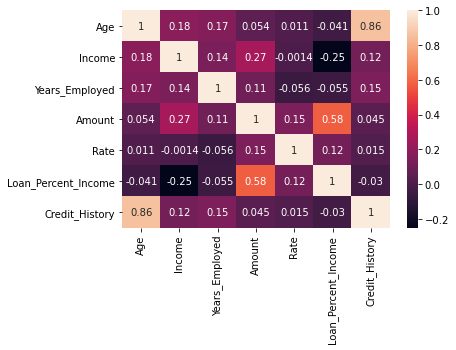

In [23]:
# Heat map for correlations between numeric variables
sns.heatmap(X.corr(), annot = True)


Based on the heatmap above, all the numeric values have a weak correlation with each other.

In [24]:
# Summary statistics for the entire Dataset

X.describe()

,Age,Income,Years_Employed,Amount,Rate,Loan_Percent_Income,Credit_History
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


Distributions of dataset:

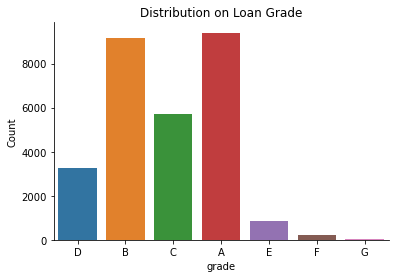

In [25]:
sns.countplot(data = df, x='grade')
plt.ylabel('Count')
plt.title('Distribution on Loan Grade')
sns.despine()
plt.show()

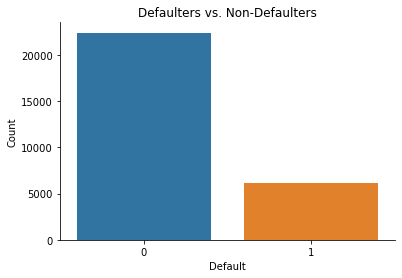

In [26]:
sns.countplot(data = df, x='Default')
plt.ylabel('Count')
plt.title('Defaulters vs. Non-Defaulters')
sns.despine()
plt.show()

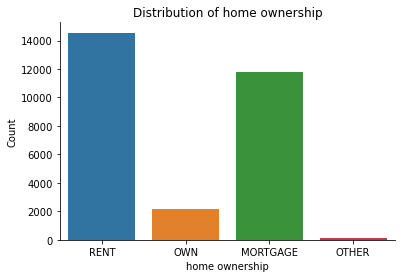

In [27]:
sns.countplot(data = df, x='home ownership')
plt.ylabel('Count')
plt.title('Distribution of home ownership')
sns.despine()
plt.show()

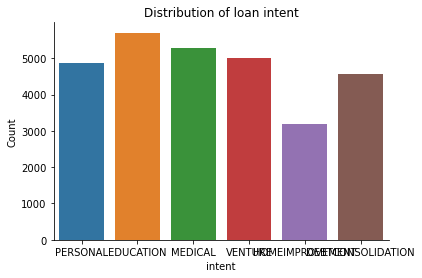

In [28]:
sns.countplot(data = df, x='intent')
plt.ylabel('Count')
plt.title('Distribution of loan intent')
sns.despine()
plt.show()

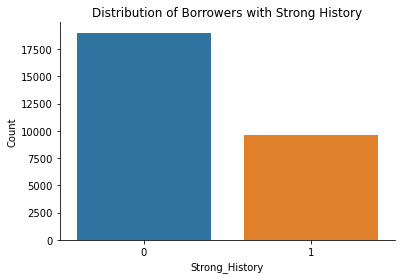

In [29]:
sns.countplot(data = df, x='Strong_History')
plt.ylabel('Count')
plt.title('Distribution of Borrowers with Strong History')
sns.despine()
plt.show()

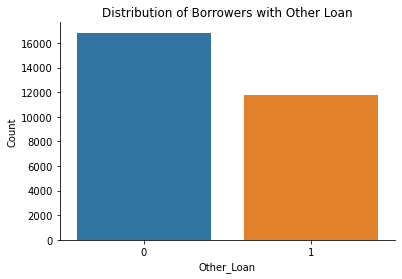

In [30]:
sns.countplot(data = df, x='Other_Loan')
plt.ylabel('Count')
plt.title('Distribution of Borrowers with Other Loan')
sns.despine()
plt.show()

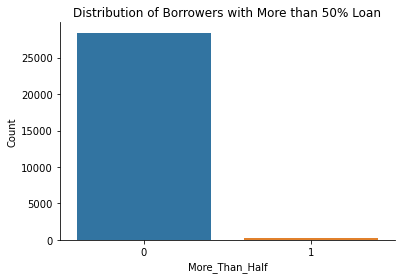

In [31]:
sns.countplot(data = df, x='More_Than_Half')
plt.ylabel('Count')
plt.title('Distribution of Borrowers with More than 50% Loan')
sns.despine()
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

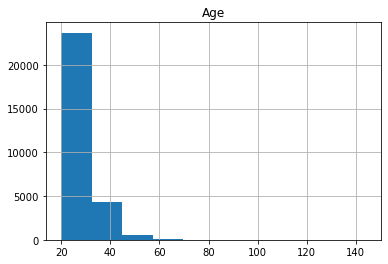

In [32]:
df.hist(column = 'Age')

array([[<AxesSubplot:title={'center':'Years_Employed'}>]], dtype=object)

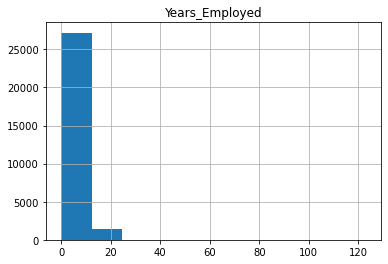

In [33]:
df.hist(column = 'Years_Employed')

array([[<AxesSubplot:title={'center':'Rate'}>]], dtype=object)

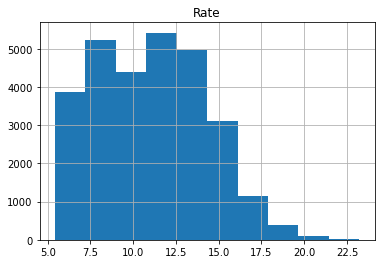

In [34]:
df.hist(column = 'Rate')

array([[<AxesSubplot:title={'center':'Credit_History'}>]], dtype=object)

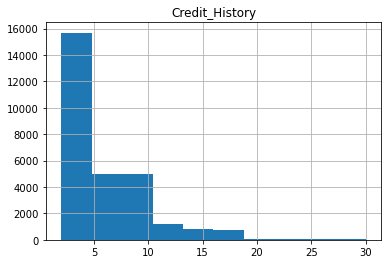

In [35]:
df.hist(column = 'Credit_History')

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

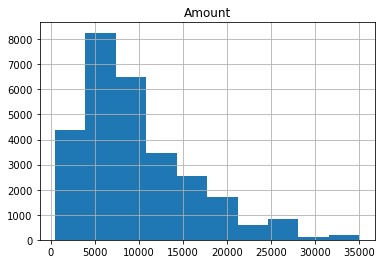

In [36]:
df.hist(column = 'Amount')

array([[<AxesSubplot:title={'center':'Loan_Percent_Income'}>]],
      dtype=object)

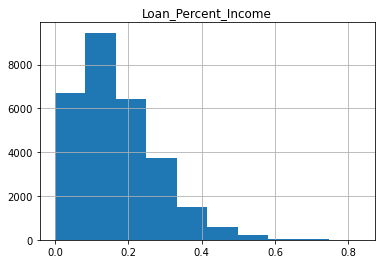

In [37]:
df.hist(column = 'Loan_Percent_Income')

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

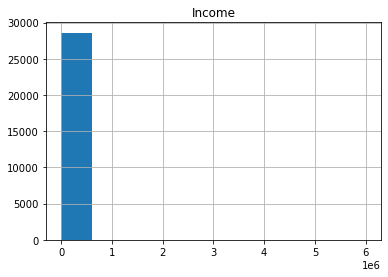

In [38]:
df.hist(column = 'Income')

After seeing trends and distributions for the entire dataset, lets break the dataset into two parts; one for defaulters and one for non-defaulters to see if the trends and distributions are the same.

In [39]:
# Creating sets for defaulters and non-defaulters
D = df[df['Default'] == 1]
ND = df[df['Default'] == 0]

# Trends For Defaulters

In [59]:
D_X = D[Numeric]

In [60]:
print(D_X)

       Age  Income  Years_Employed  Amount   Rate  Loan_Percent_Income  \
0       22   59000           123.0   35000  16.02                 0.59   
2       25    9600             1.0    5500  12.87                 0.57   
3       23   65500             4.0   35000  15.23                 0.53   
4       24   54400             8.0   35000  14.27                 0.55   
5       21    9900             2.0    2500   7.14                 0.25   
...    ...     ...             ...     ...    ...                  ...   
32563   52   71520             0.0    7000  16.82                 0.10   
32565   57   40000             1.0   15000   8.90                 0.38   
32571   60   45600             1.0   20000  10.00                 0.44   
32574   52   65004             4.0   20000  15.58                 0.31   
32578   65   76000             3.0   35000  10.99                 0.46   

       Credit_History  
0                   3  
2                   3  
3                   2  
4              

<AxesSubplot:>

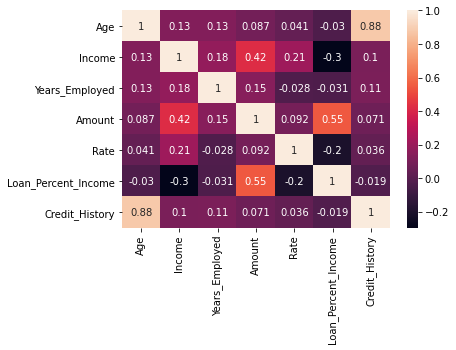

In [61]:
# Heat map for correlations between numeric variables
sns.heatmap(D_X.corr(), annot = True)


Based on the heatmap above, all the numeric values have a weak correlation with each other even for defaulters.

In [62]:
# Summary statistics for the entire Dataset

D_X.describe()

,Age,Income,Years_Employed,Amount,Rate,Loan_Percent_Income,Credit_History
count,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000
mean,27.447203,50054.547477,4.135741,11023.351604,13.123975,0.246311,5.673545
std,6.212141,36896.713589,4.157371,7161.100407,3.262529,0.132724,4.087560
min,20.000000,4000.000000,0.000000,900.000000,5.420000,0.010000,2.000000
25%,23.000000,30000.000000,1.000000,5000.000000,10.910000,0.140000,3.000000
50%,26.000000,42000.000000,3.000000,10000.000000,13.490000,0.240000,4.000000
75%,30.000000,60000.000000,6.000000,15000.000000,15.580000,0.340000,8.000000
max,70.000000,703800.000000,123.000000,35000.000000,23.220000,0.780000,30.000000


From the summary statistics above it can be seen that average age for defaulters is 27, average employment is 4 years, average credit history is 5 years, and the average rate at which they are given a loan is 13%

Distributions of dataset for defaulters:

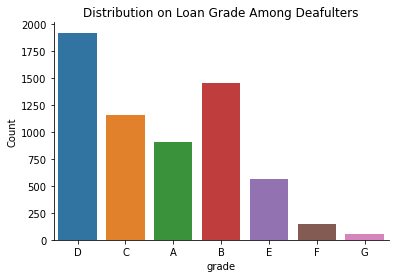

In [45]:
sns.countplot(data = D, x='grade')
plt.ylabel('Count')
plt.title('Distribution on Loan Grade Among Deafulters')
sns.despine()
plt.show()

Most of the defaulters were given a bad grade loan. Surprisingly enough there were quite a lot of B grade loans as well.

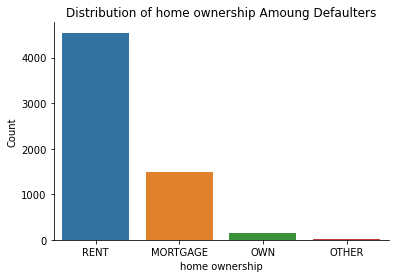

In [46]:
sns.countplot(data = D, x='home ownership')
plt.ylabel('Count')
plt.title('Distribution of home ownership Amoung Defaulters')
sns.despine()
plt.show()

Most defaulters rent and don't own a home or have a mortgage on an existing home.

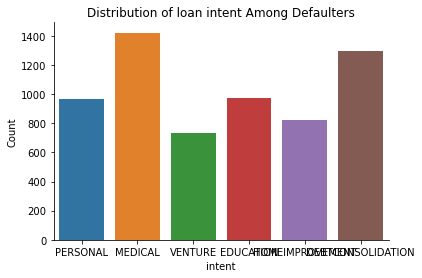

In [48]:
sns.countplot(data = D, x='intent')
plt.ylabel('Count')
plt.title('Distribution of loan intent Among Defaulters')
sns.despine()
plt.show()

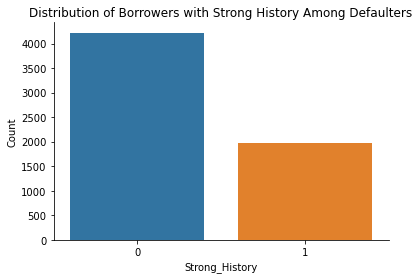

In [49]:
sns.countplot(data = D, x='Strong_History')
plt.ylabel('Count')
plt.title('Distribution of Borrowers with Strong History Among Defaulters')
sns.despine()
plt.show()

Most defaulters don't have a strong credit history of at least 7 years.

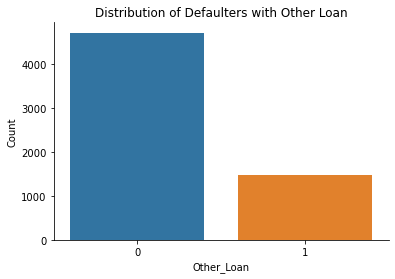

In [50]:
sns.countplot(data = D, x='Other_Loan')
plt.ylabel('Count')
plt.title('Distribution of Defaulters with Other Loan')
sns.despine()
plt.show()

Most of defaulters don't have another loan such as a mortgage.

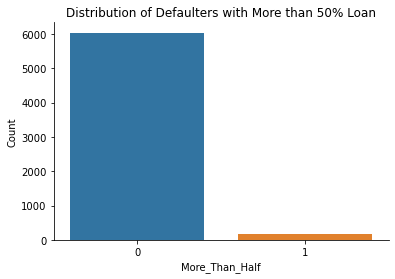

In [51]:
sns.countplot(data = D, x='More_Than_Half')
plt.ylabel('Count')
plt.title('Distribution of Defaulters with More than 50% Loan')
sns.despine()
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

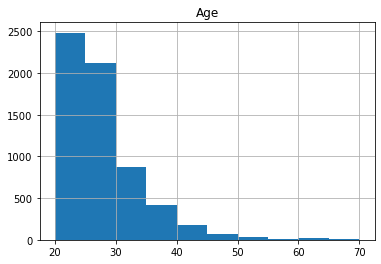

In [52]:
D.hist(column = 'Age')

array([[<AxesSubplot:title={'center':'Years_Employed'}>]], dtype=object)

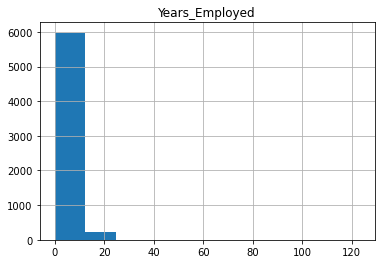

In [53]:
D.hist(column = 'Years_Employed')

array([[<AxesSubplot:title={'center':'Rate'}>]], dtype=object)

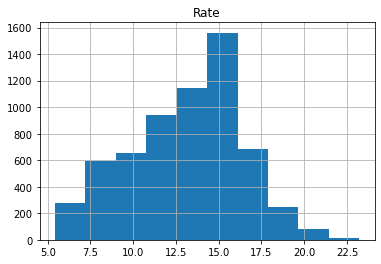

In [54]:
D.hist(column = 'Rate')

array([[<AxesSubplot:title={'center':'Credit_History'}>]], dtype=object)

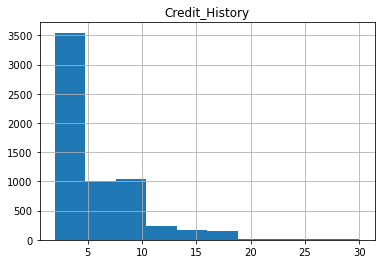

In [55]:
D.hist(column = 'Credit_History')

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

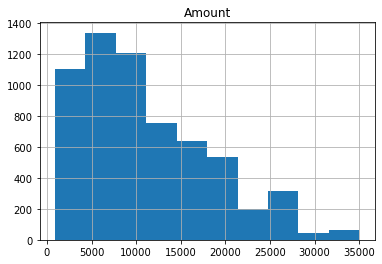

In [56]:
D.hist(column = 'Amount')

array([[<AxesSubplot:title={'center':'Loan_Percent_Income'}>]],
      dtype=object)

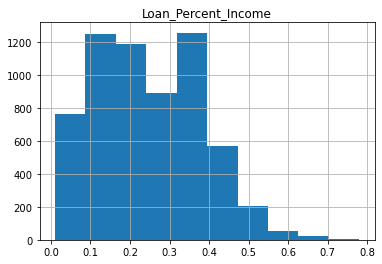

In [57]:
D.hist(column = 'Loan_Percent_Income')

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

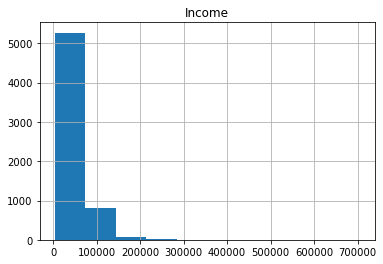

In [58]:
D.hist(column = 'Income')

# Trends For Non-Defaulters

In [63]:
N_X = ND[Numeric]

In [64]:
print(N_X)

       Age  Income  Years_Employed  Amount   Rate  Loan_Percent_Income  \
1       21    9600             5.0    1000  11.14                 0.10   
14      23  115000             2.0   35000   7.90                 0.30   
15      23  500000             7.0   30000  10.65                 0.06   
16      23  120000             0.0   35000   7.90                 0.29   
20      25  162500             2.0   35000   7.49                 0.22   
...    ...     ...             ...     ...    ...                  ...   
32575   52   64500             0.0    5000  11.26                 0.08   
32576   57   53000             1.0    5800  13.16                 0.11   
32577   54  120000             4.0   17625   7.49                 0.15   
32579   56  150000             5.0   15000  11.48                 0.10   
32580   66   42000             2.0    6475   9.99                 0.15   

       Credit_History  
1                   2  
14                  4  
15                  3  
16             

<AxesSubplot:>

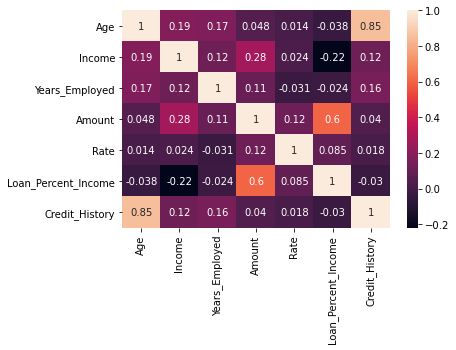

In [65]:
# Heat map for correlations between numeric variables
sns.heatmap(N_X.corr(), annot = True)


Based on the heatmap above, all the numeric values have a weak correlation with each other even for defaulters.

In [66]:
# Summary statistics for the entire Dataset

N_X.describe()

,Age,Income,Years_Employed,Amount,Rate,Loan_Percent_Income,Credit_History
count,22435.000000,2.243500e+04,22435.000000,22435.000000,22435.000000,22435.000000,22435.000000
mean,27.804636,7.123764e+04,4.969200,9278.573657,10.463636,0.148247,5.826967
std,6.335304,6.700667e+04,4.135809,6025.480030,2.972669,0.086581,4.024266
min,20.000000,7.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,4.250400e+04,2.000000,5000.000000,7.740000,0.080000,3.000000
50%,26.000000,6.000000e+04,4.000000,8000.000000,10.620000,0.130000,4.000000
75%,30.000000,8.500000e+04,7.000000,12000.000000,12.690000,0.200000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,22.060000,0.830000,30.000000


From the summary statistics above it can be seen that average age for non-defaulters is 27, average employment is 4 years, average credit history is 5 years, and the average rate at which they are given a loan is 10%

Distributions of dataset for non-defaulters:

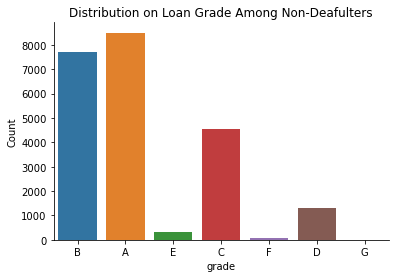

In [67]:
sns.countplot(data = ND, x='grade')
plt.ylabel('Count')
plt.title('Distribution on Loan Grade Among Non-Deafulters')
sns.despine()
plt.show()

Most of the non-defaulters were given a good grade loan. A lot of A and B grade loans.

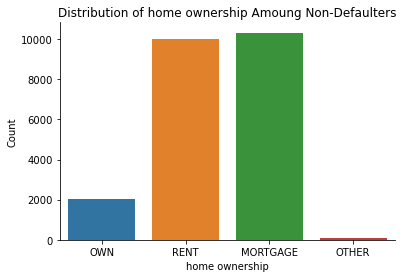

In [68]:
sns.countplot(data = ND, x='home ownership')
plt.ylabel('Count')
plt.title('Distribution of home ownership Amoung Non-Defaulters')
sns.despine()
plt.show()

Surprisingly most non-defaulters had mortgages, indicating that they had another loan.

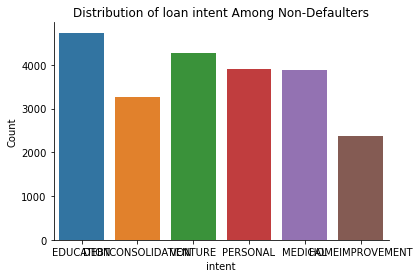

In [70]:
sns.countplot(data = ND, x='intent')
plt.ylabel('Count')
plt.title('Distribution of loan intent Among Non-Defaulters')
sns.despine()
plt.show()

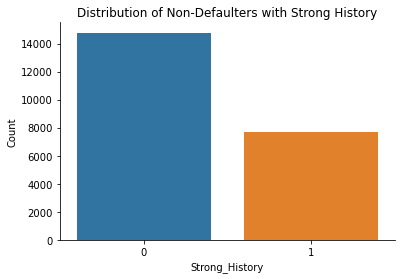

In [72]:
sns.countplot(data = ND, x='Strong_History')
plt.ylabel('Count')
plt.title('Distribution of Non-Defaulters with Strong History')
sns.despine()
plt.show()

Most non-defaulters don't have a strong credit history of at least 7 years.

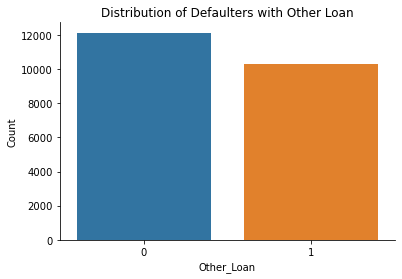

In [73]:
sns.countplot(data = ND, x='Other_Loan')
plt.ylabel('Count')
plt.title('Distribution of Defaulters with Other Loan')
sns.despine()
plt.show()

Most of non-defaulters don't have another loan such as a mortgage.

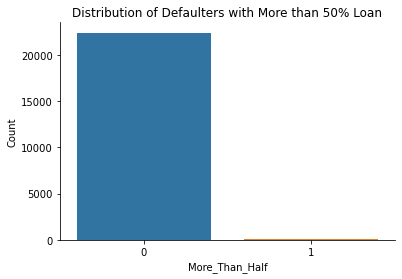

In [74]:
sns.countplot(data = ND, x='More_Than_Half')
plt.ylabel('Count')
plt.title('Distribution of Defaulters with More than 50% Loan')
sns.despine()
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

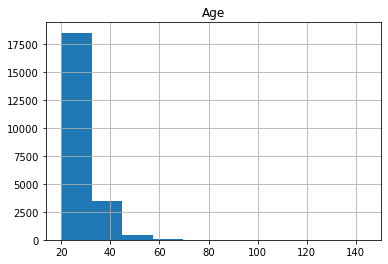

In [75]:
ND.hist(column = 'Age')

array([[<AxesSubplot:title={'center':'Years_Employed'}>]], dtype=object)

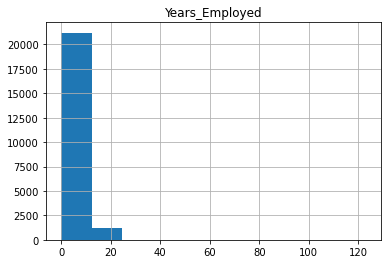

In [76]:
ND.hist(column = 'Years_Employed')

array([[<AxesSubplot:title={'center':'Rate'}>]], dtype=object)

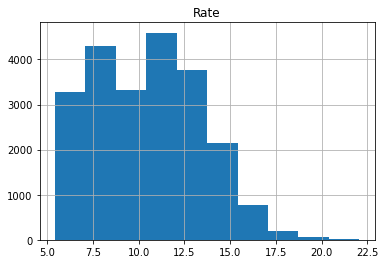

In [77]:
ND.hist(column = 'Rate')

array([[<AxesSubplot:title={'center':'Credit_History'}>]], dtype=object)

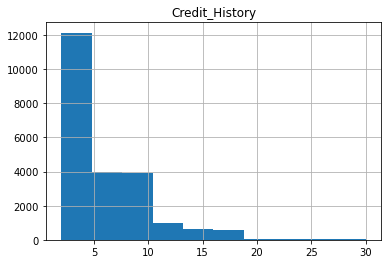

In [78]:
ND.hist(column = 'Credit_History')

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

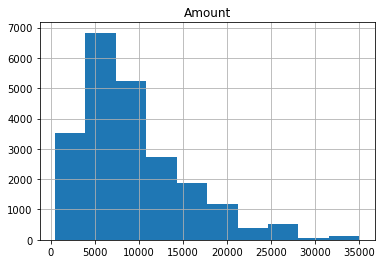

In [79]:
ND.hist(column = 'Amount')

array([[<AxesSubplot:title={'center':'Loan_Percent_Income'}>]],
      dtype=object)

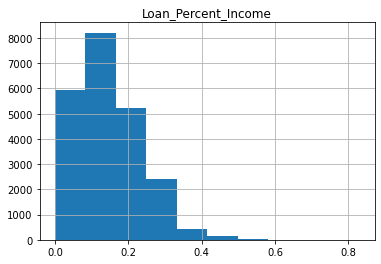

In [80]:
ND.hist(column = 'Loan_Percent_Income')

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

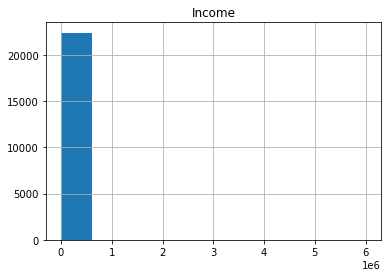

In [81]:
ND.hist(column = 'Income')

From the trends and distributions for the entire dataset as well as for defaulters and non-defaulters seperately the following conclusions can be drawn:

        1. Most of borrowers in this dataset are very young with the average being 27, and therefore in general have very little credit history.
        
        2. Most Defaulters were given bad grade loans while non-defaulters were given good grade loans
        
        3. Non-Defaulters mostly had mortgages 
        
        4. Interest rate wise defaulters on average had a higher rate than non-defaulters

# Good vs. Bad Loans

After analyzing the trends between defaulters and non-defaulters it is also important to see the Trends for good and bad loan. This imperative as it will show us whether or the bank had bias in giving certain types of loan to certain, which in turn caused them to default. Furthermore we can see if the bank gave the right or wrong type of loan to a person, and thus we can improve on this.

Given this dataset, we will define a good loan as being a loan with grades A, B, C.

In [82]:
# Creating column for good and bad loan

def good_loan(X):
    if X == 'A' or X == 'B' or X == 'C' :
        return 1
    else:
        return 0

In [87]:
df.loc[:, 'Good_Loan'] = df.loc[:, 'grade'].apply(good_loan)

In [90]:
print(df)

       Age  Income home ownership  Years_Employed           intent grade  \
0       22   59000           RENT           123.0         PERSONAL     D   
1       21    9600            OWN             5.0        EDUCATION     B   
2       25    9600       MORTGAGE             1.0          MEDICAL     C   
3       23   65500           RENT             4.0          MEDICAL     C   
4       24   54400           RENT             8.0          MEDICAL     C   
...    ...     ...            ...             ...              ...   ...   
32576   57   53000       MORTGAGE             1.0         PERSONAL     C   
32577   54  120000       MORTGAGE             4.0         PERSONAL     A   
32578   65   76000           RENT             3.0  HOMEIMPROVEMENT     B   
32579   56  150000       MORTGAGE             5.0         PERSONAL     B   
32580   66   42000           RENT             2.0          MEDICAL     B   

       Amount   Rate  Default  Loan_Percent_Income default on file  \
0       35000  16

In [92]:
GL = df[df['Good_Loan'] == 1]
BL = df[df['Good_Loan'] == 0]

In [116]:
print(GL['grade'].value_counts())

A    9402
B    9151
C    5699
Name: grade, dtype: int64


In [117]:
print(BL['grade'].value_counts())

D    3248
E     870
F     209
G      59
Name: grade, dtype: int64


# Trends For Good Loans

In [94]:
GL_X = GL[Numeric]

In [95]:
print(GL_X)

       Age  Income  Years_Employed  Amount   Rate  Loan_Percent_Income  \
1       21    9600             5.0    1000  11.14                 0.10   
2       25    9600             1.0    5500  12.87                 0.57   
3       23   65500             4.0   35000  15.23                 0.53   
4       24   54400             8.0   35000  14.27                 0.55   
5       21    9900             2.0    2500   7.14                 0.25   
...    ...     ...             ...     ...    ...                  ...   
32576   57   53000             1.0    5800  13.16                 0.11   
32577   54  120000             4.0   17625   7.49                 0.15   
32578   65   76000             3.0   35000  10.99                 0.46   
32579   56  150000             5.0   15000  11.48                 0.10   
32580   66   42000             2.0    6475   9.99                 0.15   

       Credit_History  
1                   2  
2                   3  
3                   2  
4              

<AxesSubplot:>

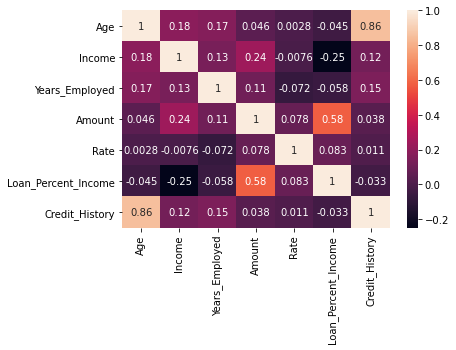

In [96]:
# Heat map for correlations between numeric variables
sns.heatmap(GL_X.corr(), annot = True)


Based on the heatmap above, all the numeric values have a weak correlation with each other even for defaulters.

In [97]:
# Summary statistics for the entire Dataset

GL_X.describe()

,Age,Income,Years_Employed,Amount,Rate,Loan_Percent_Income,Credit_History
count,24252.000000,2.425200e+04,24252.000000,24252.000000,24252.000000,24252.000000,24252.000000
mean,27.692067,6.666361e+04,4.815273,9305.978888,10.161218,0.164862,5.776101
std,6.301133,6.439411e+04,4.096293,6016.779365,2.613996,0.104958,4.021909
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.999600e+04,2.000000,5000.000000,7.725000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.380000,0.140000,4.000000
75%,30.000000,8.000000e+04,7.000000,12000.000000,12.230000,0.220000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,16.110000,0.830000,30.000000


From the summary statistics above it can be seen that on average the rate for good loans is 10.16%, amount is 9305, and percent to income is 16%.

Distributions of dataset for good loans:

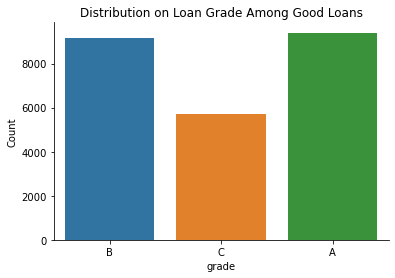

In [98]:
sns.countplot(data = GL, x='grade')
plt.ylabel('Count')
plt.title('Distribution on Loan Grade Among Good Loans')
sns.despine()
plt.show()

Most good loans are A and B grade.

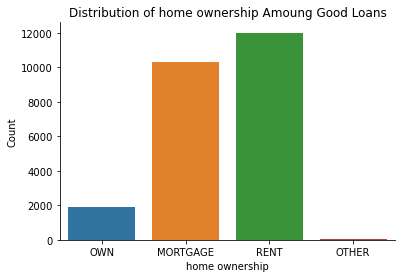

In [99]:
sns.countplot(data = GL, x='home ownership')
plt.ylabel('Count')
plt.title('Distribution of home ownership Amoung Good Loans')
sns.despine()
plt.show()

Most good loan holders were renting or had mortgages.

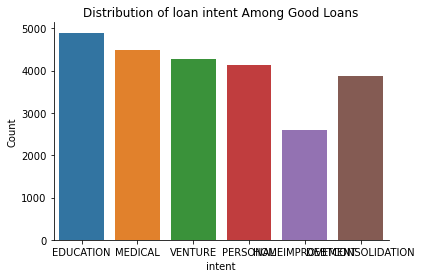

In [101]:
sns.countplot(data = GL, x='intent')
plt.ylabel('Count')
plt.title('Distribution of loan intent Among Good Loans')
sns.despine()
plt.show()

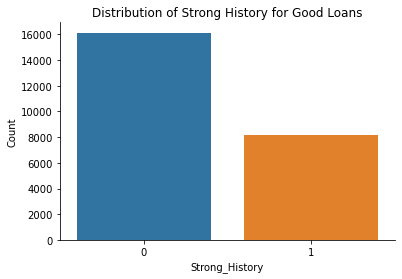

In [102]:
sns.countplot(data = GL, x='Strong_History')
plt.ylabel('Count')
plt.title('Distribution of Strong History for Good Loans')
sns.despine()
plt.show()

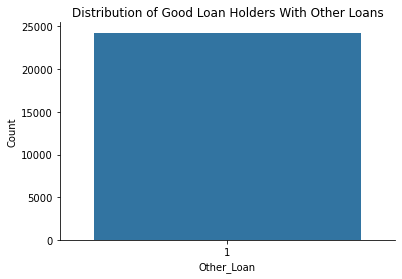

In [103]:
sns.countplot(data = GL, x='Other_Loan')
plt.ylabel('Count')
plt.title('Distribution of Good Loan Holders With Other Loans')
sns.despine()
plt.show()

Most of non-defaulters don't have another loan such as a mortgage.

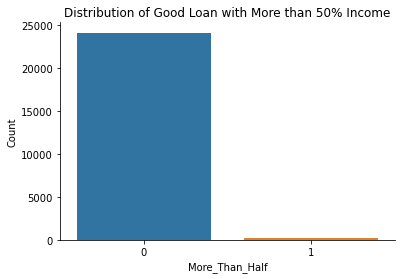

In [105]:
sns.countplot(data = GL, x='More_Than_Half')
plt.ylabel('Count')
plt.title('Distribution of Good Loan with More than 50% Income')
sns.despine()
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

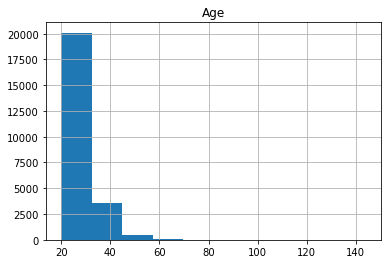

In [106]:
GL.hist(column = 'Age')

array([[<AxesSubplot:title={'center':'Years_Employed'}>]], dtype=object)

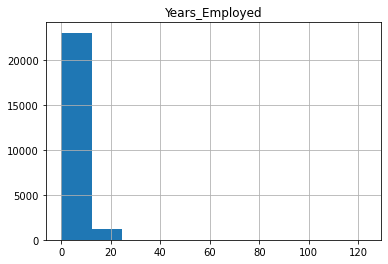

In [107]:
GL.hist(column = 'Years_Employed')

array([[<AxesSubplot:title={'center':'Rate'}>]], dtype=object)

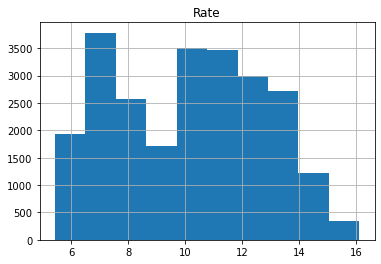

In [108]:
GL.hist(column = 'Rate')

array([[<AxesSubplot:title={'center':'Credit_History'}>]], dtype=object)

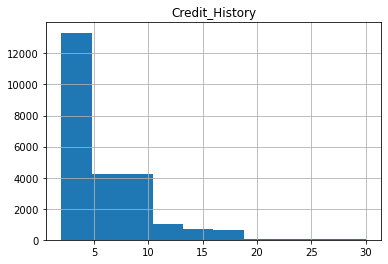

In [109]:
GL.hist(column = 'Credit_History')

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

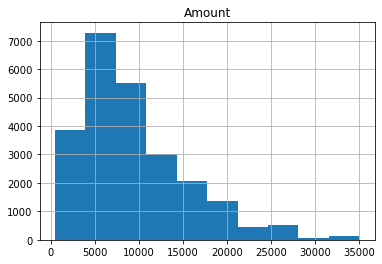

In [110]:
GL.hist(column = 'Amount')

array([[<AxesSubplot:title={'center':'Loan_Percent_Income'}>]],
      dtype=object)

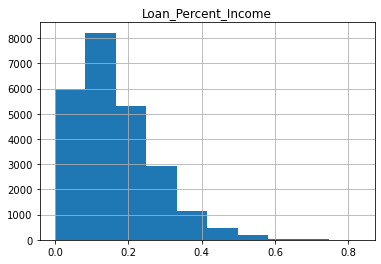

In [111]:
GL.hist(column = 'Loan_Percent_Income')

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

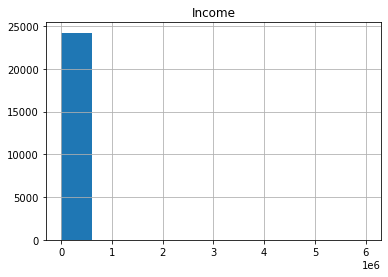

In [112]:
GL.hist(column = 'Income')

# Trends for Bad Loans

In [118]:
BL_X = BL[Numeric]

In [119]:
print(BL_X)

       Age  Income  Years_Employed  Amount   Rate  Loan_Percent_Income  \
0       22   59000           123.0   35000  16.02                 0.59   
9       21   10000             6.0    1600  14.74                 0.16   
13      26  108160             4.0   35000  18.39                 0.32   
17      23   92111             7.0   35000  20.25                 0.32   
18      23  113000             8.0   35000  18.25                 0.31   
...    ...     ...             ...     ...    ...                  ...   
32554   60   98000             1.0   15000  16.29                 0.15   
32555   51   80000             3.0   18000  18.78                 0.23   
32559   51   58000             2.0    1500  19.03                 0.03   
32563   52   71520             0.0    7000  16.82                 0.10   
32574   52   65004             4.0   20000  15.58                 0.31   

       Credit_History  
0                   3  
9                   3  
13                  4  
17             

<AxesSubplot:>

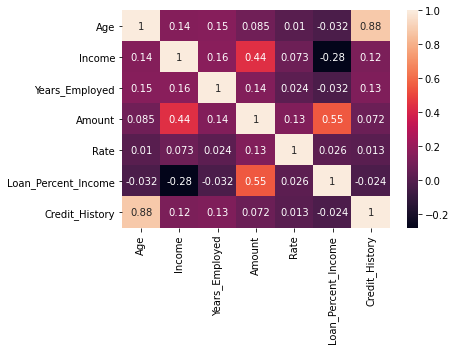

In [120]:
# Heat map for correlations between numeric variables
sns.heatmap(BL_X.corr(), annot = True)


Based on the heatmap above, all the numeric values have a weak correlation with each other even for defaulters.

In [121]:
# Summary statistics for the entire Dataset

BL_X.describe()

,Age,Income,Years_Employed,Amount,Rate,Loan_Percent_Income,Credit_History
count,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000
mean,27.921569,66570.669175,4.641587,11594.630643,15.898274,0.195068,5.891245
std,6.358880,49606.777385,4.461071,7550.021650,1.561615,0.110572,4.128029
min,20.000000,4200.000000,0.000000,1000.000000,6.000000,0.010000,2.000000
25%,23.000000,37000.000000,2.000000,5600.000000,14.910000,0.110000,3.000000
50%,26.000000,55000.000000,4.000000,10000.000000,15.650000,0.180000,4.000000
75%,30.000000,78000.000000,7.000000,16000.000000,16.700000,0.267500,8.000000
max,70.000000,703800.000000,123.000000,35000.000000,23.220000,0.700000,30.000000


From the summary statistics above it can be seen that on average the rate for bad loans is 15.9%, amount is 11595, and percent to income is 19%.

Distributions of dataset for bad loans:

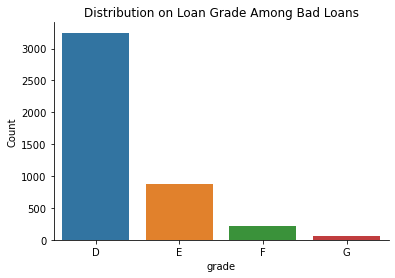

In [122]:
sns.countplot(data = BL, x='grade')
plt.ylabel('Count')
plt.title('Distribution on Loan Grade Among Bad Loans')
sns.despine()
plt.show()

Most bad loans are D grade.

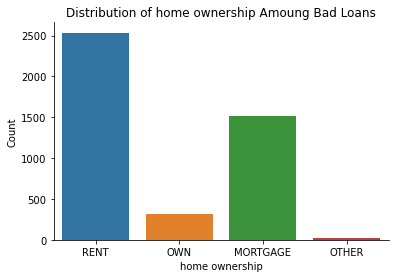

In [123]:
sns.countplot(data = BL, x='home ownership')
plt.ylabel('Count')
plt.title('Distribution of home ownership Amoung Bad Loans')
sns.despine()
plt.show()

Most bad loan holders were renting.

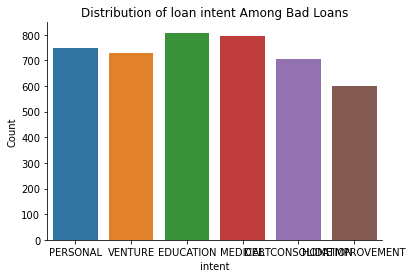

In [124]:
sns.countplot(data = BL, x='intent')
plt.ylabel('Count')
plt.title('Distribution of loan intent Among Bad Loans')
sns.despine()
plt.show()

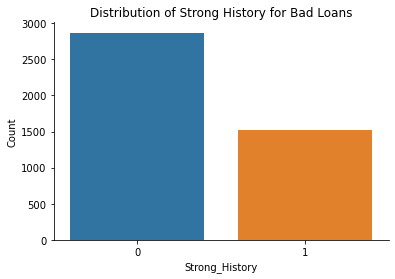

In [125]:
sns.countplot(data = BL, x='Strong_History')
plt.ylabel('Count')
plt.title('Distribution of Strong History for Bad Loans')
sns.despine()
plt.show()

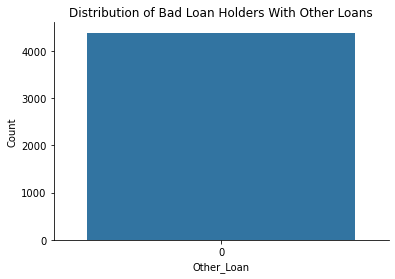

In [126]:
sns.countplot(data = BL, x='Other_Loan')
plt.ylabel('Count')
plt.title('Distribution of Bad Loan Holders With Other Loans')
sns.despine()
plt.show()

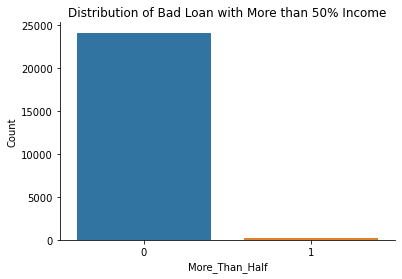

In [127]:
sns.countplot(data = GL, x='More_Than_Half')
plt.ylabel('Count')
plt.title('Distribution of Bad Loan with More than 50% Income')
sns.despine()
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

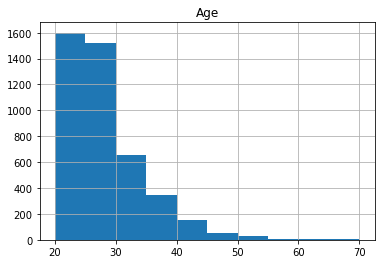

In [128]:
BL.hist(column = 'Age')

array([[<AxesSubplot:title={'center':'Years_Employed'}>]], dtype=object)

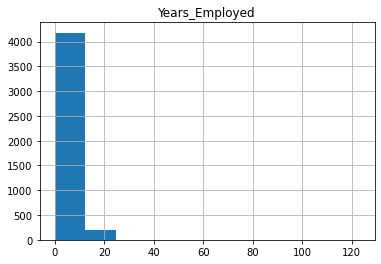

In [129]:
BL.hist(column = 'Years_Employed')

array([[<AxesSubplot:title={'center':'Rate'}>]], dtype=object)

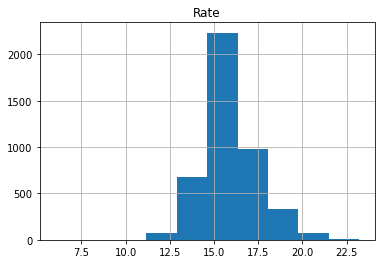

In [130]:
BL.hist(column = 'Rate')

array([[<AxesSubplot:title={'center':'Credit_History'}>]], dtype=object)

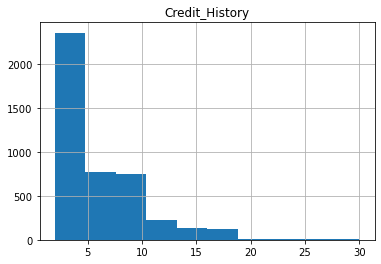

In [131]:
BL.hist(column = 'Credit_History')

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

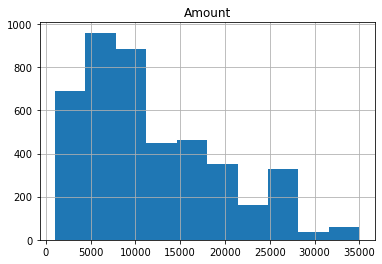

In [132]:
BL.hist(column = 'Amount')

array([[<AxesSubplot:title={'center':'Loan_Percent_Income'}>]],
      dtype=object)

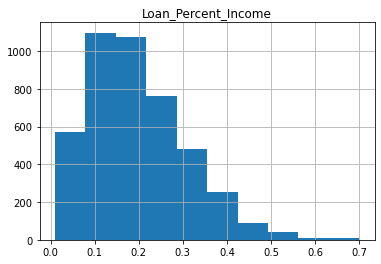

In [133]:
BL.hist(column = 'Loan_Percent_Income')

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

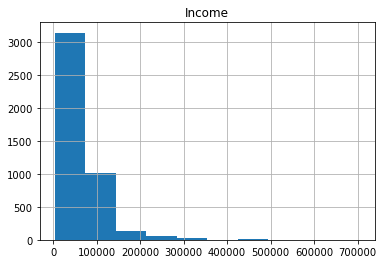

In [134]:
BL.hist(column = 'Income')

# Conclusions 

From the initial EDA of this dataset, the following conclusions can be drawn:
    
    1. Most of the borrowers are young, have less than 7 years of credit history, less years of employment, and therefore less income.
    
    2. Most non-defaulters got loans that were of bad grade, but there was a sizable amount that got good grade loans.
    
    3. In terms of interest rate, the defaulters got on average loans with higher interest rates.